In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os
import cv2
import torch
import scipy.io
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
from google.colab.patches import cv2_imshow

In [3]:
%cd '/gdrive/MyDrive/cs331'

/gdrive/MyDrive/cs331


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!pip install -r './yolov5/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.8 MB/s eta 0:00:00


In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-30 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
img_path = '/gdrive/MyDrive/cs331/img/NguyenHue.jpg'
img = cv2.imread(img_path)

In [7]:
model.conf = 0.1
detection = model(img)

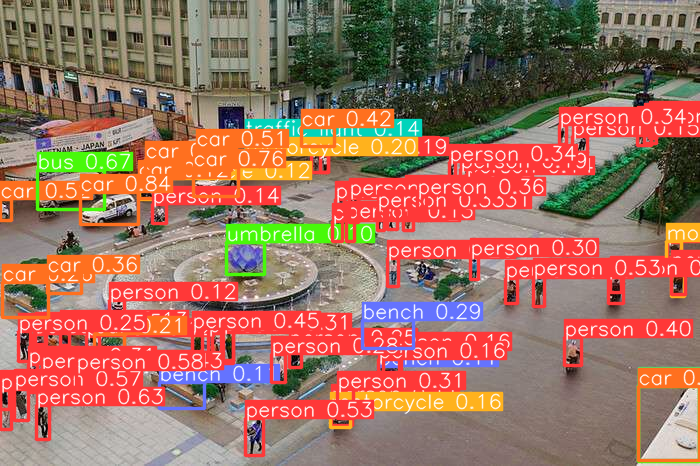

In [8]:
detection.show()

In [10]:
result = []
for i in np.array(detection.pandas().xyxy[0].to_dict(orient="records")):
  if i['name'] == 'person':
    result.append(i)
result = np.array(result) 

In [11]:
result_center = []
for i in result:
  x_center = (i['xmin']+i['xmax'])/2
  y_center = (i['ymin']+i['ymax'])/2
  result_center.append([x_center,y_center])


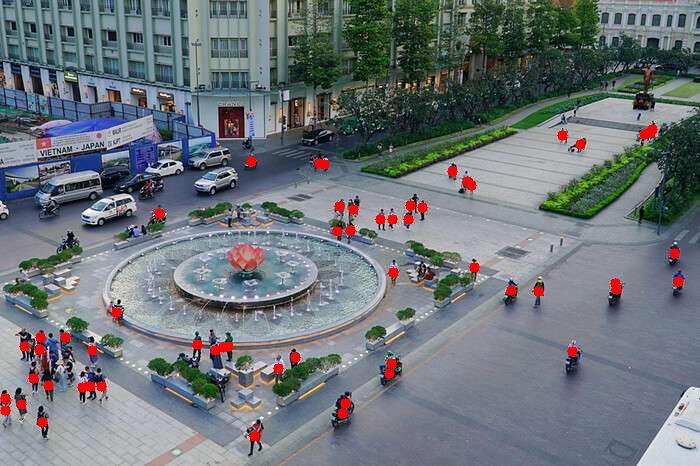

In [18]:
img_tmp = cv2.imread(img_path)
img2 = img_tmp.copy()
for i in result_center:
  img2 = cv2.circle(img2, (int(i[0]),int(i[1])), radius=5, color=(0, 0, 255), thickness=-1)
cv2_imshow(img2)

In [19]:
n_cols = n_rows = 20
frame_height, frame_width = img.shape[0], img.shape[1]
cell_size_width = frame_width//n_cols
cell_size_height = frame_height//n_rows
heat_matrix = np.zeros((n_rows+1, n_cols+1))

In [20]:
def get_row_col(x,y):
  return int(y/cell_size_height), int(x/cell_size_width)

In [21]:
for i in result_center:
  r,c = get_row_col(i[0],i[1])
  heat_matrix[r,c] += 1

In [22]:
heat_matrix = resize(heat_matrix,(frame_height, frame_width))
heat_matrix /= np.max(heat_matrix) 
heat_matrix = np.uint8(heat_matrix*255)

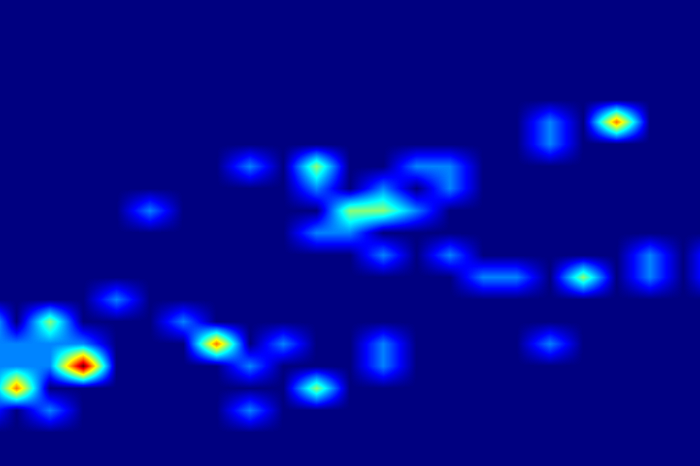

In [23]:
img_heat = cv2.applyColorMap(heat_matrix, cv2.COLORMAP_JET)
cv2_imshow(img_heat)

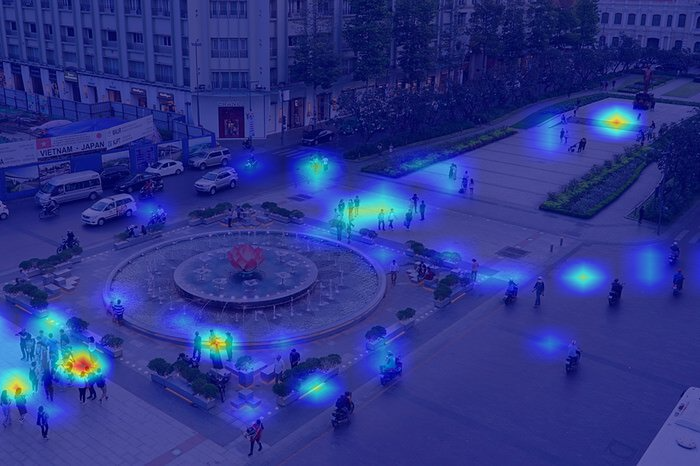

In [25]:
cv2.addWeighted(img_heat, 0.6, img_tmp, 0.4,0,img)
cv2_imshow(img)